# libs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
import scipy.integrate
import pandas as pd

import seaborn as sns

from decimal import Decimal
import scipy.special
import time


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [ ]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
        print(H)
    return 1
    
first_prior = np.vectorize(uniform_prior)



In [ ]:

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    sigma = 0.03
    mu = .5
      
    return (math.sqrt(2*math.pi)*sigma)**-1 * math.exp(-2**-1 * ((H-mu)/sigma)**2 )

second_prior = np.vectorize(gaussian_prior)

# توان زوج بزرگ باید باشد، زیاد هم مهم نیست البته چقدر بزرگ
def lasvegascoin(H):
    return (H-.5)**16
    
third_prior= np.vectorize(lasvegascoin)

### Bonus point

❓Why do we need to use np.vectorize here?

 چون قراره برای تعداد زیادی اچ بین 0و1 بکشیم پاستریر رو و باید کل وکتور اچ رو بدیم بهش

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [ ]:
H = np.linspace(0, 1, 1000, dtype=np.float128)

In [ ]:
def normal(pdf):
  
  for i in range(len(pdf)):
    #print(i.shape)
    pdf[i]=pdf[i]/np.max(pdf[i])

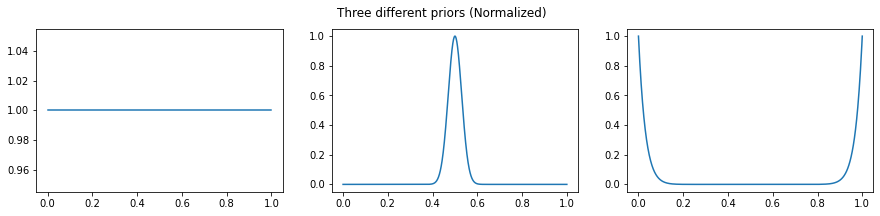

In [ ]:
#yooooo
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')


priors= [first_prior(H),second_prior(H),third_prior(H)]



normal(priors)
for i in range(len(priors)):
  plt.subplot(1,3,i+1)
  plt.plot(H,priors[i])


plt.show()


## (c)

❓Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

✅مثل اینکه هر کدوم ازین فلوت-شماره ها تا ی مقداری گنجایش دارن و اگر مثلا اونا رو به توان برسونیم یا... که از حد گنجایششون رد بشه، یا ارور میدن یا جواب اشتباه تحویل میدن. ب نظر میرسه نامپای فلوت128 بیشترین گنجایش فلوت نامپای هست و عدد جلوش نشان دهنده بیت هایی هست که استفاده میکنه

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [ ]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])
#head= 1 tail= 0


In [ ]:
def posterior(H,datai):
  ones =  np.count_nonzero(datai == 1)
  zeros = len(datai) - ones
  a = np.power(H,ones) * np.power((1-H),zeros)
  a= priors*a
  
  return a

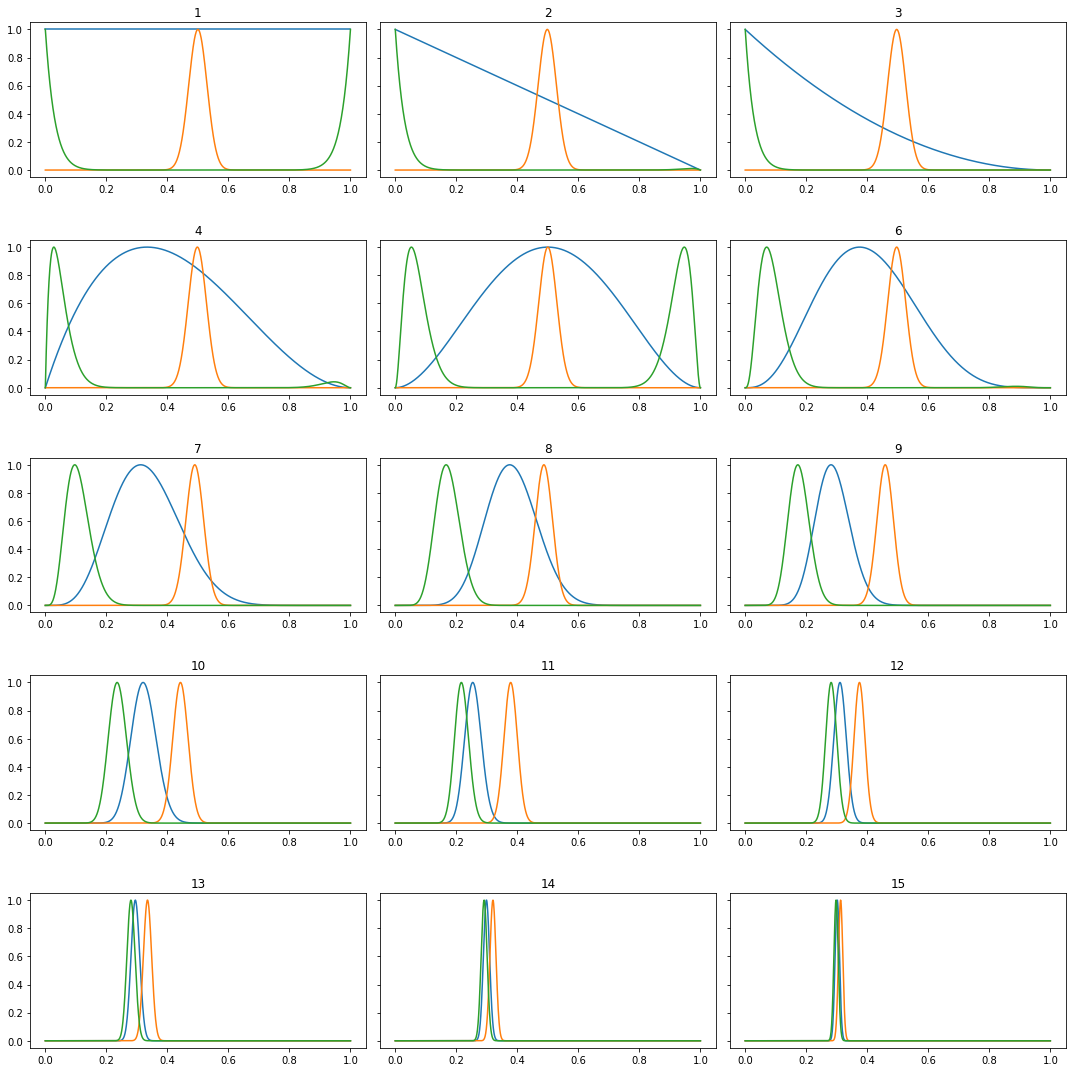

In [ ]:
#plt.figure(figsize=(15, 15))

fig, axes = plt.subplots(5, 3, figsize=(15, 15), sharey=True)
for i in range(15):
  a= posterior(H,data[i])
  normal(a)
  for j in a:
    axes[i//3,i%3].plot(H,j);
    axes[i//3,i%3].set_title(i+1)
  
  
    
    
plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

# New Section

## (a)

Write a function to calculate raw moments of a given distribution 

In [ ]:
# اگر صرفا تابع داده باشن
def n_momentofpdf(pdf,n):
  def f(x):
    return x**n
  def g(x):
    return f(x)*pdf(x)

  #واقعا راه دیگه ای برای ضرب دوتا فانکشن نیست؟ 
  return scipy.integrate.quad(g,-np.inf,np.inf)[0]

In [ ]:

def n_moment(ens,n):
  jam=0
  for i in ens:
    jam+= (i)**n
  return jam/len(ens)

In [ ]:
def n_moment3(lenens,count,n):
  jam=0
  for i in count:
    jam+= (i)**n * count[i]
  return jam/lenens

## (b)

Write a function to calculate central moments of a given distribution

In [ ]:
# اگر صرفا تابع داده باشن
def centralmomentofpdf(pdf,n):
  mean= n_moment(pdf,1)
  def f(x):
    return (x-mean)**n
  def g(x):
    return f(x)*pdf(x)
  return scipy.integrate.quad(g,-np.inf,np.inf)[0]

In [ ]:
# اگر انسامبل داده باشن
def centralmoment(ens,n):
  jam=0
  for i in ens:
    jam+= (i-np.mean(ens))**n
  return jam/len(ens)

In [ ]:
# اگر انسامبل داده باشن
from collections import Counter
def centralmoment3(means,lenens,count,n):
  jam=0
  for i in count:
    jam+= (i-means)**n * count[i]
  return jam/lenens

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

جلوتر همه مومنت هاشون رو حساب كردم

In [ ]:
n=10**6
bio= np.random.binomial(30,.7,n)
poi= np.random.poisson(2.1,n)
gau= np.random.normal(2.1,.3,n)

## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

✅scipy.stats.moment calculate central moments, but scipy.stats.describe calculate raw moments

In [ ]:
from scipy import stats

In [ ]:
# میدونم کد مسخره ای شده، ولی وقتی با بقیه توابع که بالاتر با شماره 1  اخرشون نام گذاری شده نوشتم، برنامه خیلی طول میکشید!

a={'bio':bio,'poi':poi,'gau':gau}
b= list( a.keys() )

counts=[Counter(bio),Counter(poi),Counter(gau)]
means=[np.mean(bio),np.mean(poi),np.mean(gau)]

for i in range(3):
  for j in range(3):
    print( '%s central moment **%d** st:'%(b[i],j+1),' ',scipy.stats.moment( a[b[i]],j+1 ),'   ', 'my func:', centralmoment3(means[i],n,counts[i],j+1) )
    print( '%s raw moment %d st:'%(b[i],j+1),' ',scipy.stats.describe(a[b[i]])[j+2],'   ', 'my func:', n_moment3(n,counts[i],j+1) )
  print('\n')

bio central moment **1** st:   0.0     my func: -9.944294276920119e-16
bio raw moment 1 st:   20.99988     my func: 20.99988
bio central moment **2** st:   6.294337985600001     my func: 6.294337985600001
bio raw moment 2 st:   6.294344279944281     my func: 447.289298
bio central moment **3** st:   -2.5122140383234726     my func: -2.512214038323474
bio raw moment 3 st:   -0.15908584863302092     my func: 9654.870054


poi central moment **1** st:   0.0     my func: -5.739586583786149e-17
poi raw moment 1 st:   2.101493     my func: 2.101493
poi central moment **2** st:   2.096218170950999     my func: 2.0962181709510004
poi raw moment 2 st:   2.096220267171266     my func: 6.512491
poi central moment **3** st:   2.08546512548434     my func: 2.08546512548434
poi raw moment 3 st:   0.6871447136145693     my func: 24.581795


gau central moment **1** st:   0.0     my func: 3.322786490400631e-17
gau raw moment 1 st:   2.099862669610717     my func: 2.099862669610703
gau central moment *

❓❓همونطور که میبینید، اصلا جواب های راو مومنت های تابع خودم و سایپای به هم نمیخوره!


# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/data/data.txt',header =[0],delimiter='\t',dtype={})
data

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


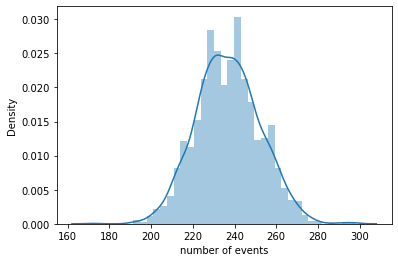

In [ ]:
sns.distplot(data.iloc[:,1],norm_hist=1);

## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [ ]:
avein1s=[]
avein75=[]
num=[]

for i in range(data.shape[0]):
  avein1s.append( data.iloc[i][1]/7.5 )
  if i != 0:
    num.append(data.iloc[i][1]+num[-1])
  else:
    num.append(data.iloc[0][1])

print('the ave of all in 1 s:',np.average(avein1s))

the ave of all in 1 s: 31.588085937499997


In [ ]:
for i in range(len(num)):
  avein75.append( num[i]/((i+1)) )

print('the ave of all in 7.5 s:',np.average(avein75) )

the ave of all in 7.5 s: 235.9699483417049


In [ ]:
data.shape

(2048, 2)

In [ ]:
dataframe= pd.DataFrame([num,avein1s,avein75],index=['num','avein1s','avein75s']).T
dataframe.to_csv('new_data.txt',index=0)
dataframe

,num,avein1s,avein75s
0,232.0,30.933333,232.000000
1,472.0,32.000000,236.000000
2,717.0,32.666667,239.000000
3,943.0,30.133333,235.750000
4,1166.0,29.733333,233.200000
...,...,...,...
2043,484278.0,35.333333,236.926614
2044,484498.0,29.333333,236.918337
2045,484750.0,33.600000,236.925709
2046,484979.0,30.533333,236.921837


In [ ]:
pd.read_csv('/content/new_data.txt')

,num,avein1s,avein75s
0,232.0,30.933333,232.000000
1,472.0,32.000000,236.000000
2,717.0,32.666667,239.000000
3,943.0,30.133333,235.750000
4,1166.0,29.733333,233.200000
...,...,...,...
2043,484278.0,35.333333,236.926614
2044,484498.0,29.333333,236.918337
2045,484750.0,33.600000,236.925709
2046,484979.0,30.533333,236.921837


## (c)

Use a unifor prior and do the same analysis as question 1 to get the **mean decay number per interval**. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

In [ ]:
# mean decay number in interval is somthing about 30. we estimate it to be between 20 and 50
n=1000
H = np.linspace(20,50, n, dtype=np.float128) #= m dtype=np.float128)


In [ ]:
def uniform_prior(H):
    if  H > 50 or H <20:
        return 0
        #print(H)
    return 1
    
first_prior = np.vectorize(uniform_prior)



In [ ]:
def normal(pdf):
  for i in range(len(pdf)):
    #print(i.shape)
    pdf[i]=pdf[i]/np.max(pdf[i])

In [ ]:
def posterior_poi1(H,i,numi):
  t= 1
  lan= H 
  
  #print('one:', lan**(numi/i) * np.exp(-lan) )
  #print('two:', scipy.special.factorial(numi/(i*7.5)) )
  poi= lan**(numi/(i*7.5)) * np.exp(-lan)  / scipy.special.factorial(numi/(i*7.5))
  return  poi * first_prior(H) 
  #return poi * second_prior(H)

The time of execution of uniform priorer : 2.2540884017944336


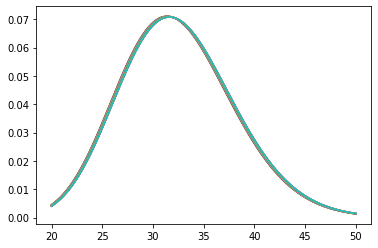

In [ ]:
start = time.time()

for j in range(1,len(num)):
  
  a= posterior_poi1(H,j,num[j])
  if j%100 == 0:
    plt.plot(H,a)

end = time.time()
print("The time of execution of uniform priorer :", end-start)

In [ ]:
H[np.argmax(a)]

31.591591591591591026

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

In [ ]:
def gaussian_prior(H):
    if  H > 50 or H < 20:
        return 0
    
    sigma = 4
    mu = 30
      
    return (math.sqrt(2*math.pi)*sigma)**-1 * math.exp(-2**-1 * ((H-mu)/sigma)**2 )

second_prior = np.vectorize(gaussian_prior)

In [ ]:
def posterior_poi2(H,i,numi):
  t= 1
  lan= H 
  
  #print('one:', lan**(numi/i) * np.exp(-lan) )
  #print('two:', scipy.special.factorial(numi/(i*7.5)) )
  poi= lan**(numi/(i*7.5)) * np.exp(-lan)  / scipy.special.factorial(numi/(i*7.5))
  return poi * second_prior(H)

The time of execution of gaussian proier : 5.357183456420898


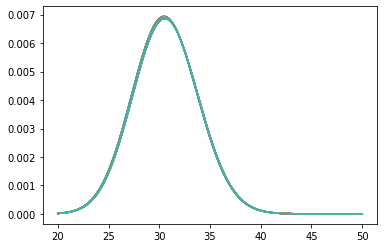

In [ ]:
start = time.time()

for j in range(1,len(num)):
  
  a= posterior_poi2(H,j,num[j])
  if j%100 == 0:
    plt.plot(H,a)

end = time.time()
print("The time of execution of gaussian proier :", end-start)

In [ ]:
H[np.argmax(a)]

30.540540540540540349

In [ ]:
def lasvegascoin(H):
    return (H-30)**16
    
third_prior= np.vectorize(lasvegascoin)

In [ ]:
def posterior_poi3(H,i,numi):
  t= 1
  lan= H 
  
  #print('one:', lan**(numi/i) * np.exp(-lan) )
  #print('two:', scipy.special.factorial(numi/(i*7.5)) )
  poi= lan**(numi/(i*7.5)) * np.exp(-lan)  / scipy.special.factorial(numi/(i*7.5))
  return poi * second_prior(H)

The time of execution of gaussian proier : 5.33413290977478


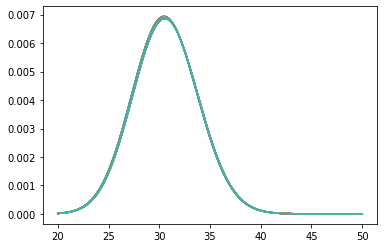

In [ ]:
start = time.time()

for j in range(1,len(num)):
  
  a= posterior_poi3(H,j,num[j])
  if j%100 == 0:
    plt.plot(H,a)


end = time.time()
print("The time of execution of gaussian proier :", end-start)

In [ ]:
H[np.argmax(a)]

30.540540540540540349

✅ uniform is the fastest likelihood

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

0.022359586469675653

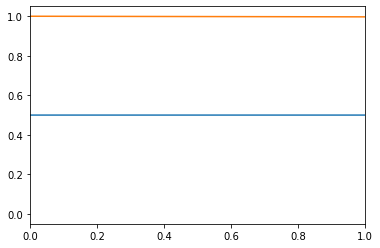

In [ ]:
r= 31

t=np.linspace(0,1,num=10000)
plt.xlim(0,1)
plt.plot(t,[.5]*10000)
plt.plot(np.exp(-r*t))

i= np.log(.5)/(-r)
i
# چرا شکل و جواب تحلیلی به هم نمیخوره؟؟

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.